In [1]:
from scipy import interpolate
from numpy import polynomial as P
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [7]:
x = np.array([1,2,3,4])
y = np.array([1,3,5,4])

In [13]:
# using polynomial of 3rd degree (number of data points - 1)
deg = len(x) - 1
A = P.polynomial.polyvander(x, deg) #Vandermonde matrix
c = linalg.solve(A, y)
c

array([ 2. , -3.5,  3. , -0.5])

In [14]:
# so f(x) = 2 - 3.5x + 3x**2 - 0.5x**3
# create polynomial representation
f1 = P.Polynomial(c)
f1(2.5)

4.187499999999998

In [16]:
# using another polynomial basis (Chebyshev)
A = P.chebyshev.chebvander(x, deg)
c = linalg.solve(A, y)
c

array([ 3.5  , -3.875,  1.5  , -0.125])

In [17]:
f2 = P.Chebyshev(c)
f2(2.5)

4.187499999999999

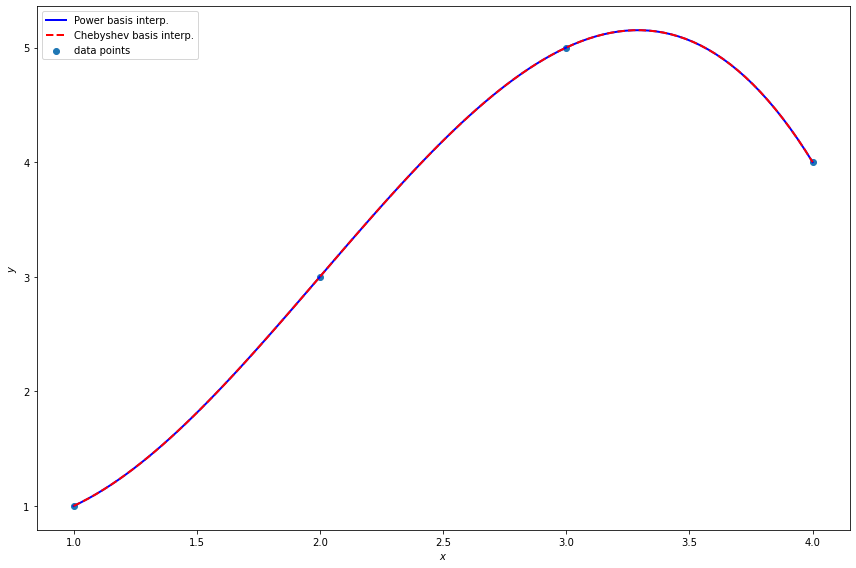

In [21]:
xx = np.linspace(x.min(), x.max(), 100)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xx, f1(xx), 'b', lw=2, label='Power basis interp.')
ax.plot(xx, f2(xx), '--r', lw=2, label='Chebyshev basis interp.')
ax.scatter(x, y, label='data points')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r'$y$')
ax.legend(loc='best')
fig.tight_layout()

In [22]:
# Using fit function
f1b = P.Polynomial.fit(x, y, deg)
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.])

In [23]:
f2b = P.Chebyshev.fit(x, y, deg)
f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], domain=[1., 4.], window=[-1.,  1.])